In [15]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
np.random.seed(15)

In [16]:
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
karate_label = np.loadtxt("karate_label.txt")

In [17]:
adj = nx.to_numpy_array(adjlist)
label = karate_label[:,-1]

In [18]:
d= 4
P = np.random.random((4,34))
Q = np.random.random((4,34))

In [19]:
zuzv = np.dot(P.T,Q)

In [20]:
def loss(a,b):
    return np.sum((a-b)**2)

In [21]:
epoch = 500
lr = 0.001

In [22]:
loss_list = [0 for _ in range(epoch)]
for i in range(epoch):
    P -= lr *  np.dot(zuzv-adj,Q.T).T
    Q -= lr *  np.dot(zuzv-adj,P.T).T
    
    
    loss_list[i] = loss(zuzv,adj)
    zuzv = np.dot(P.T,Q)

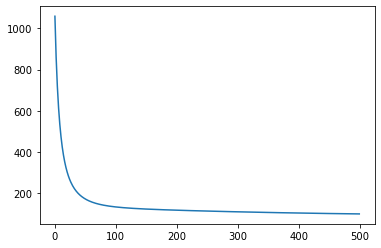

In [23]:
plt.plot(loss_list)

In [24]:
ans = np.dot(adj,P.T)

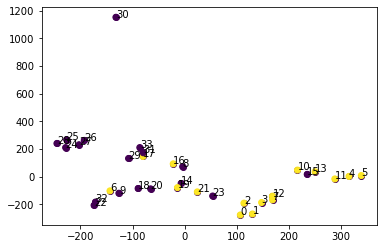

In [25]:
model = TSNE(learning_rate=100,perplexity=3)
transformed = model.fit_transform(ans)
xs = transformed[:,0]
ys = transformed[:,1]

for i in range(len(xs)):
    plt.scatter(xs[i],ys[i],c = label[i])
    plt.text(xs[i],ys[i],i)
plt.scatter(xs,ys,c=label)

plt.show()